# General Template for Hall Calulation

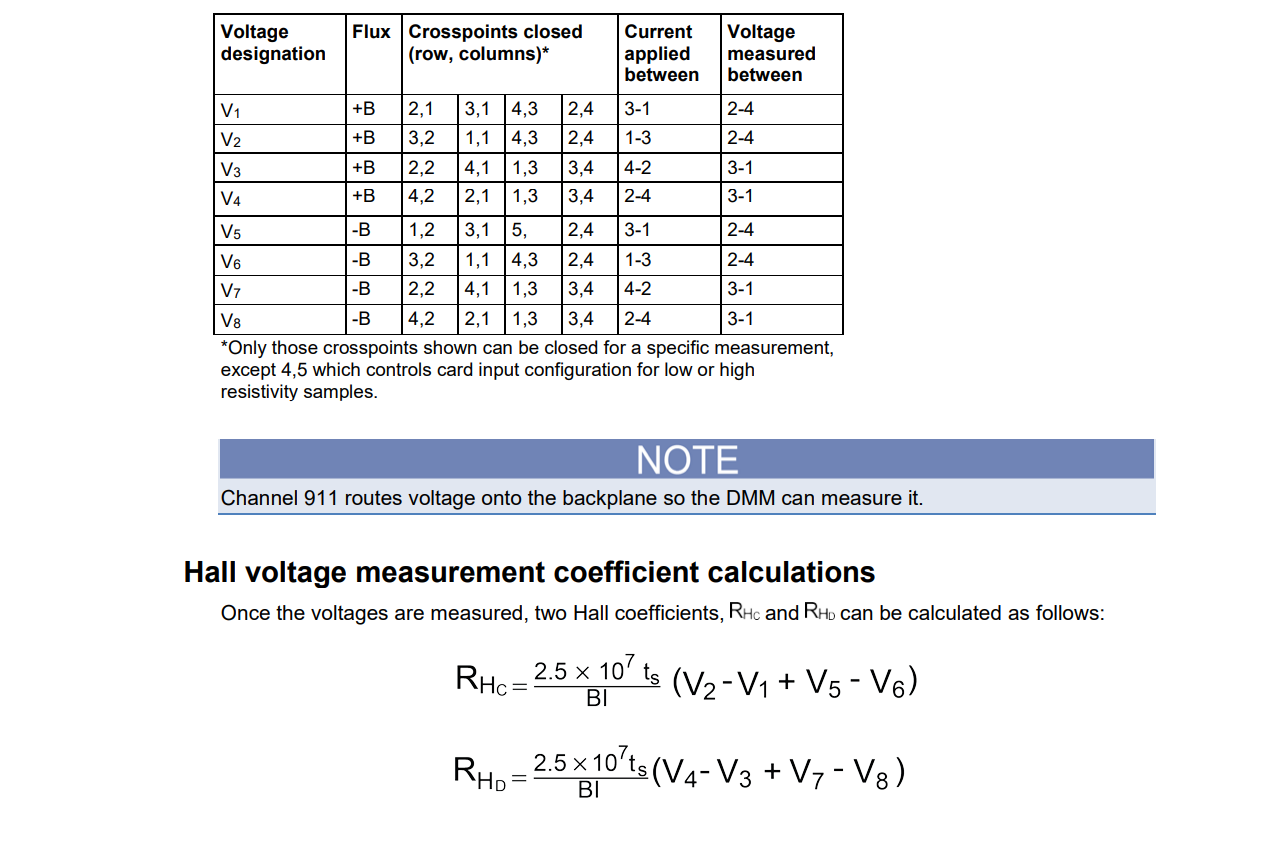

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
filename='C:\\Users\\Admin\\Desktop\\Data\\8_march_2023\\A304_SRO_NGO_inside_dynacool_1T_Hall_100K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.312451,100.046271,-386.178806,386.059212,493.351877,-493.233787,8.183000e-07,1000000
1,0.001,9000.414209,99.998780,-387.918600,387.940218,494.042157,-493.930887,7.872000e-07,1000000
2,0.001,8000.527539,99.999810,-389.788391,389.812102,494.758653,-494.660408,7.542000e-07,1000000
3,0.001,7000.450415,100.000344,-391.692697,391.733102,495.516110,-495.410962,7.498000e-07,1000000
4,0.001,6000.471362,99.999863,-393.606127,393.640962,496.275604,-496.171611,7.468000e-07,1000000
...,...,...,...,...,...,...,...,...,...
61,0.001,6000.256689,100.000371,-394.472767,394.471631,495.489849,-495.378849,6.380000e-07,1000000
62,0.001,7000.457739,100.000010,-391.977178,391.985313,495.077841,-494.969473,6.346000e-07,1000000
63,0.001,8000.312891,100.000614,-389.798683,389.827955,494.469115,-494.368600,6.331000e-07,1000000
64,0.001,9000.450977,99.999970,-387.745015,387.768429,493.831988,-493.723970,6.286000e-07,1000000


### Converting B to integer B

In [27]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [28]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.312451,10000,100.046271,-386.178806,386.059212,493.351877,-493.233787,8.183000e-07,1000000
1,0.001,9000.414209,9000,99.998780,-387.918600,387.940218,494.042157,-493.930887,7.872000e-07,1000000
2,0.001,8000.527539,8000,99.999810,-389.788391,389.812102,494.758653,-494.660408,7.542000e-07,1000000
3,0.001,7000.450415,7000,100.000344,-391.692697,391.733102,495.516110,-495.410962,7.498000e-07,1000000
4,0.001,6000.471362,6000,99.999863,-393.606127,393.640962,496.275604,-496.171611,7.468000e-07,1000000


In [29]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

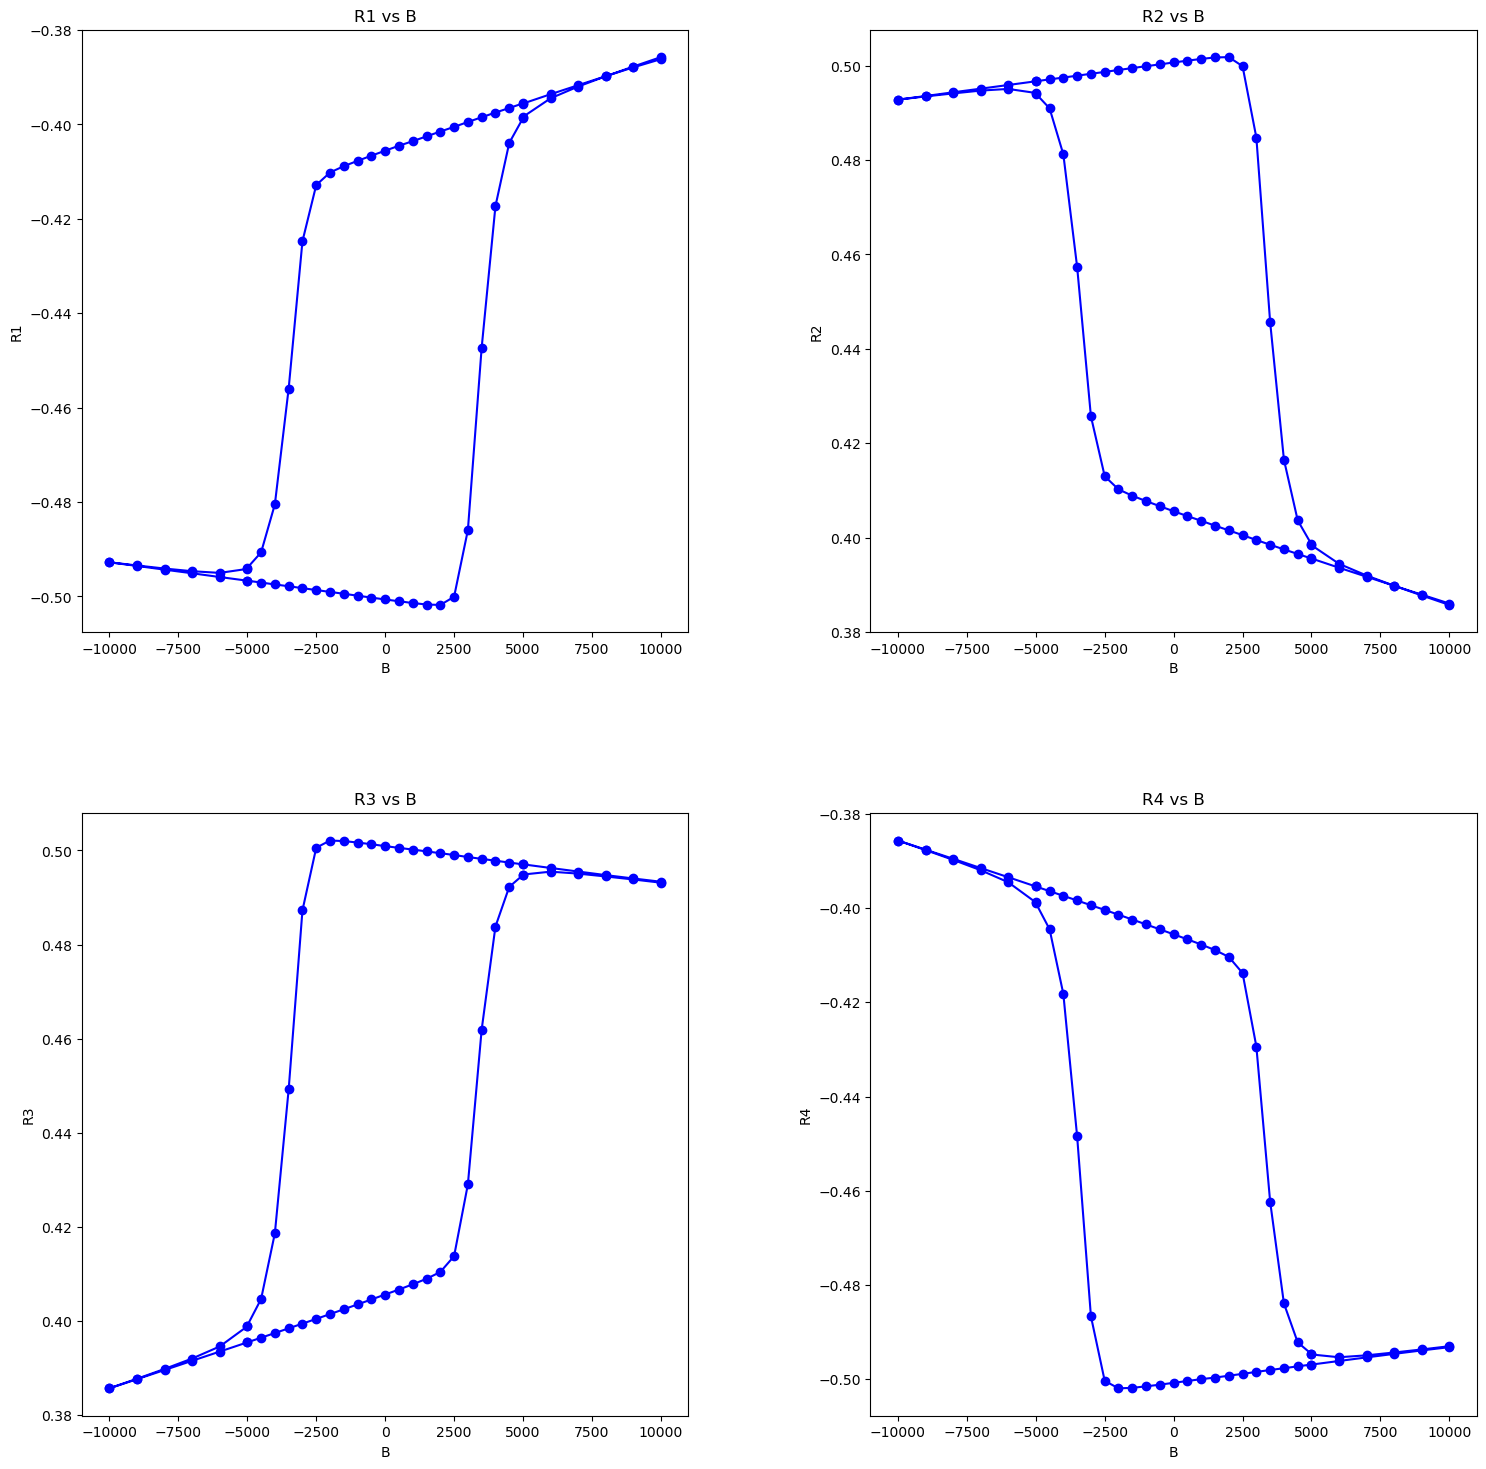

In [30]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [31]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [32]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [33]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [34]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.312451,10000,100.046271,-386.178806,386.059212,493.351877,-493.233787,8.183000e-07,1000000
1,0.001,9000.414209,9000,99.998780,-387.918600,387.940218,494.042157,-493.930887,7.872000e-07,1000000
2,0.001,8000.527539,8000,99.999810,-389.788391,389.812102,494.758653,-494.660408,7.542000e-07,1000000
3,0.001,7000.450415,7000,100.000344,-391.692697,391.733102,495.516110,-495.410962,7.498000e-07,1000000
4,0.001,6000.471362,6000,99.999863,-393.606127,393.640962,496.275604,-496.171611,7.468000e-07,1000000


In [35]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.337109,-10000,100.000069,-492.760482,492.791604,385.728043,-385.624328,6.770000e-07,1000000
34,0.001,-9000.608887,-9000,100.000387,-493.527472,493.552149,387.669158,-387.560145,6.593000e-07,1000000
35,0.001,-8000.508765,-8000,100.000597,-494.314896,494.343559,389.622362,-389.503890,6.666000e-07,1000000
36,0.001,-7000.588379,-7000,100.000221,-495.081622,495.111270,391.579537,-391.470802,6.759000e-07,1000000
37,0.001,-6000.380005,-6000,100.000156,-495.875967,495.890045,393.533505,-393.418242,6.658000e-07,1000000


In [36]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [37]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,100.046271,-386.178806,386.059212,493.351877,-493.233787,-492.760482,492.791604,385.728043,-385.624328,1000000
1,0.001,9000,99.998780,-387.918600,387.940218,494.042157,-493.930887,-493.527472,493.552149,387.669158,-387.560145,1000000
2,0.001,8000,99.999810,-389.788391,389.812102,494.758653,-494.660408,-494.314896,494.343559,389.622362,-389.503890,1000000
3,0.001,7000,100.000344,-391.692697,391.733102,495.516110,-495.410962,-495.081622,495.111270,391.579537,-391.470802,1000000
4,0.001,6000,99.999863,-393.606127,393.640962,496.275604,-496.171611,-495.875967,495.890045,393.533505,-393.418242,1000000


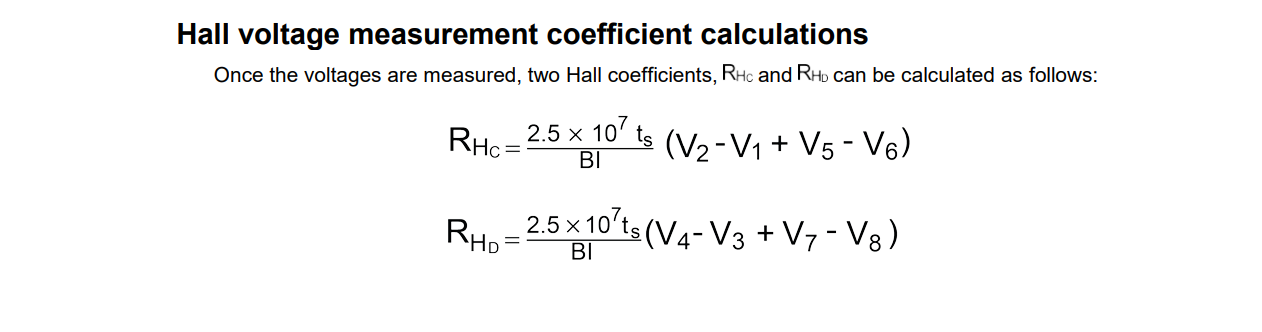
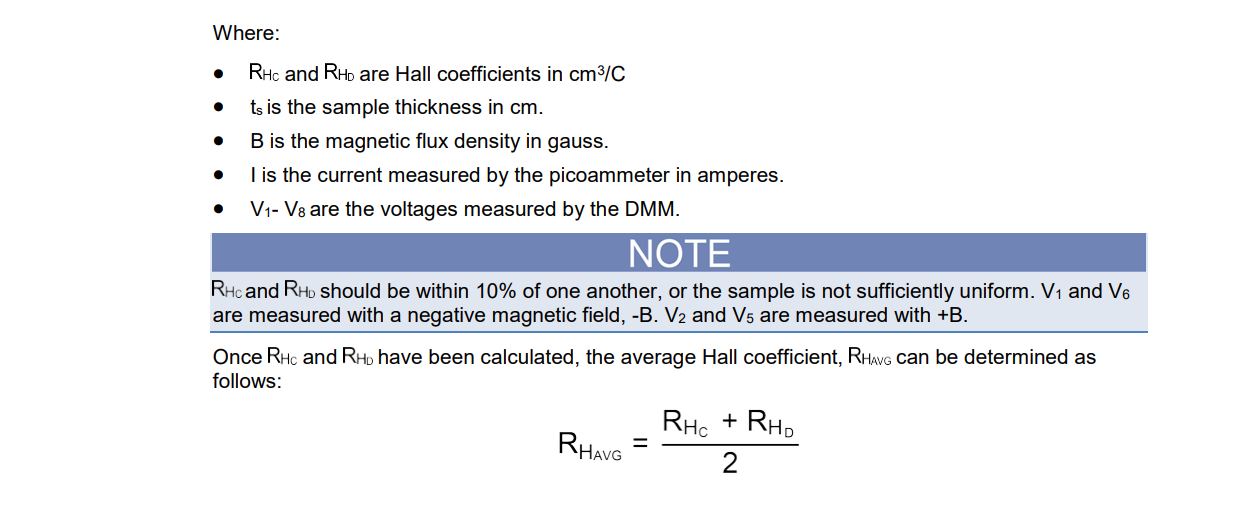

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [38]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

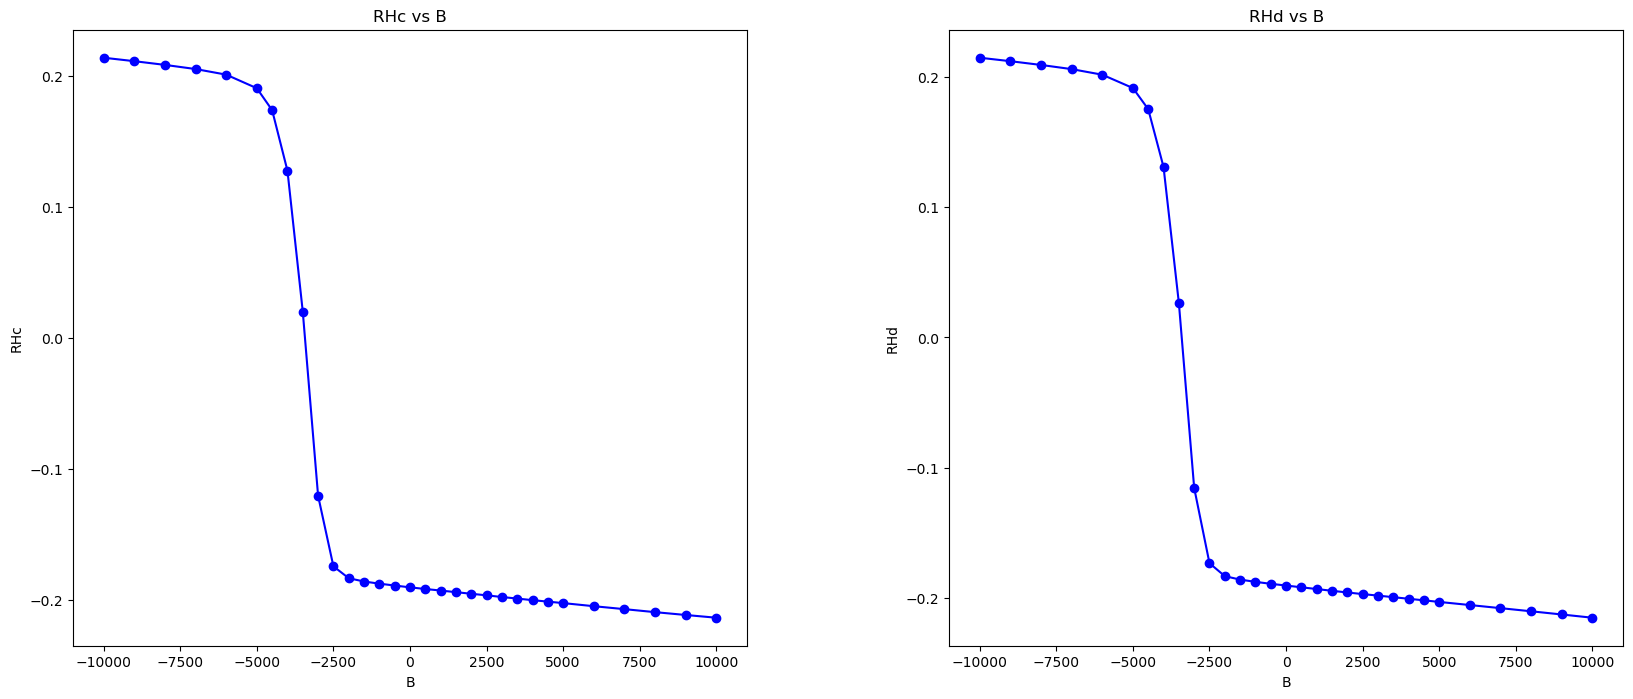

In [39]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

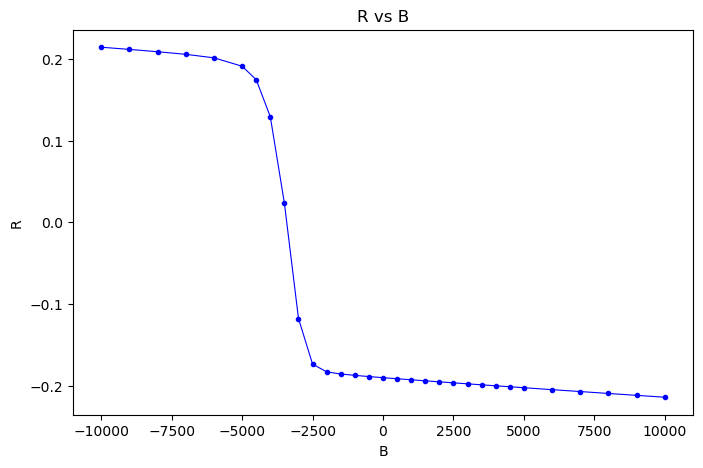

In [40]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [41]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,100.000069,-492.760482,492.791604,385.728043,-385.624328,-386.178806,386.059212,493.351877,-493.233787,1000000
1,0.001,-9000,100.000387,-493.527472,493.552149,387.669158,-387.560145,-387.918600,387.940218,494.042157,-493.930887,1000000
2,0.001,-8000,100.000597,-494.314896,494.343559,389.622362,-389.503890,-389.788391,389.812102,494.758653,-494.660408,1000000
3,0.001,-7000,100.000221,-495.081622,495.111270,391.579537,-391.470802,-391.692697,391.733102,495.516110,-495.410962,1000000
4,0.001,-6000,100.000156,-495.875967,495.890045,393.533505,-393.418242,-393.606127,393.640962,496.275604,-496.171611,1000000


### Hall resistance calculation

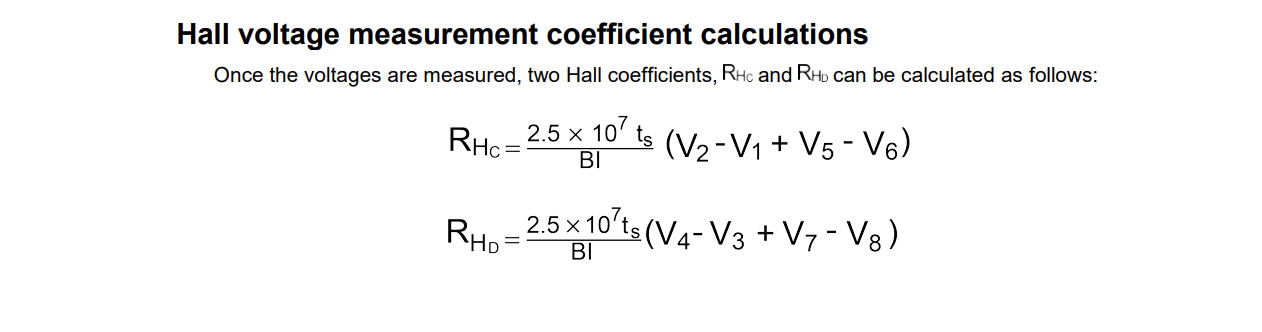

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [42]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

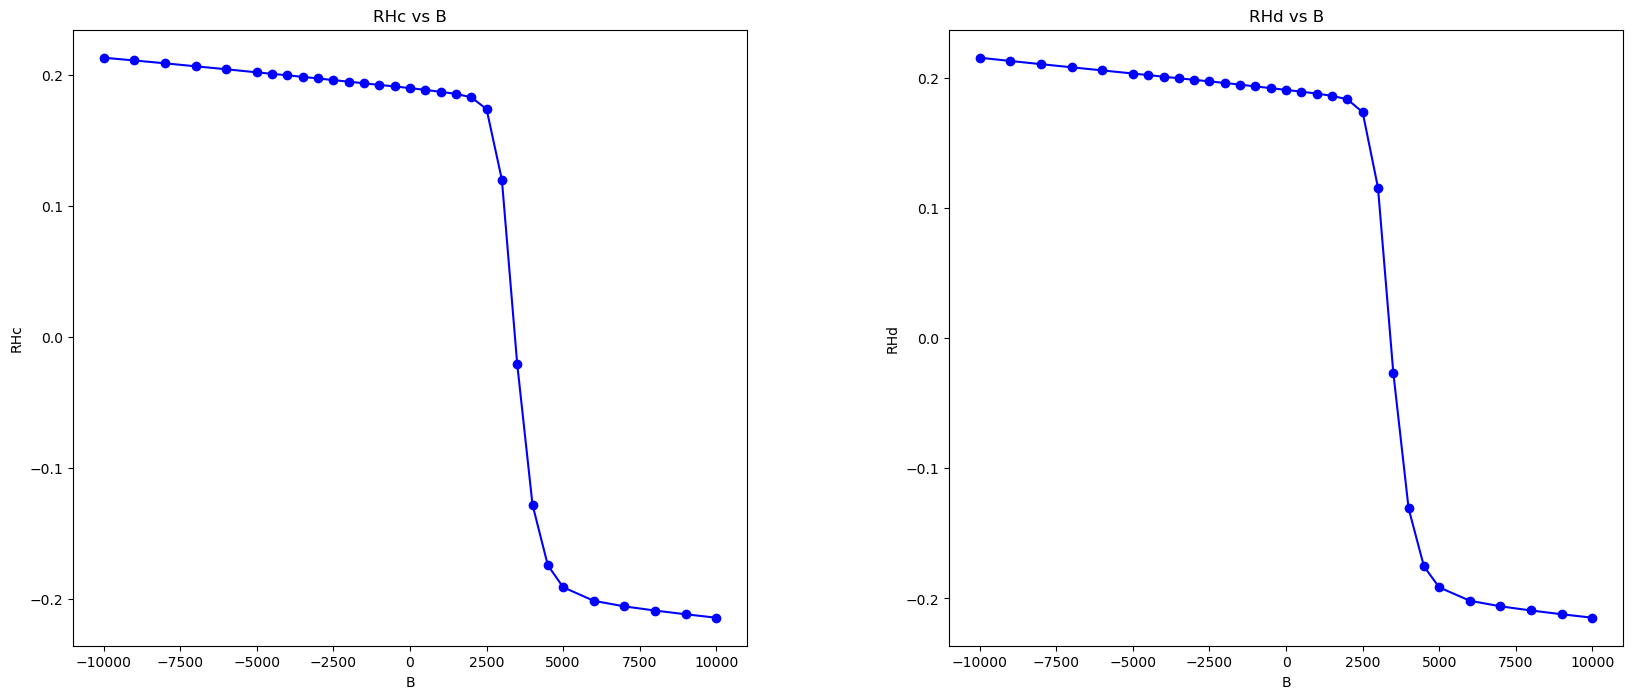

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

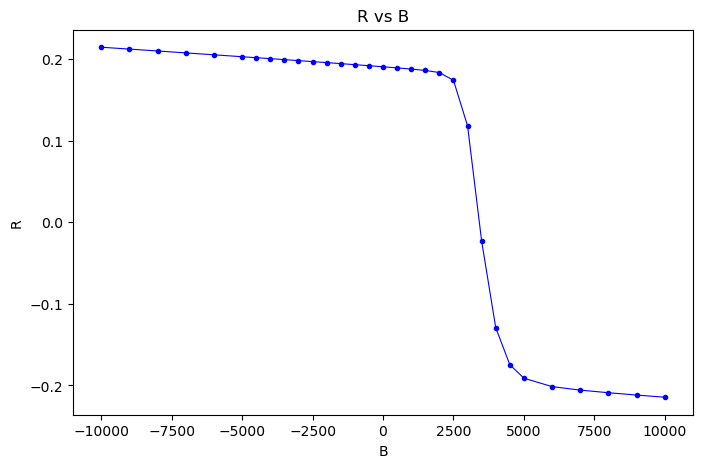

In [44]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

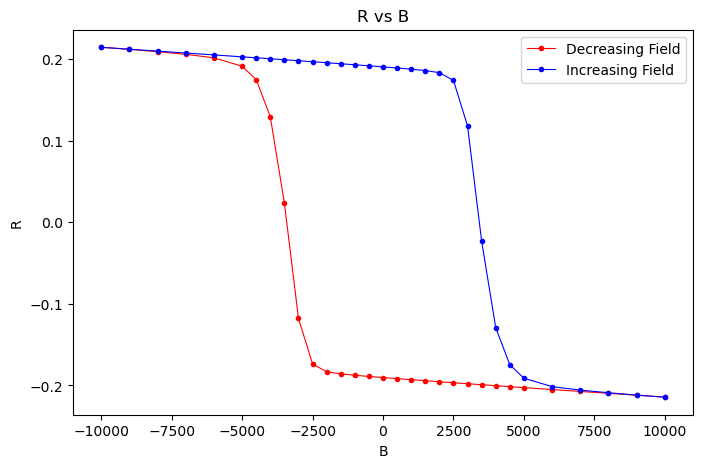

In [45]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [46]:
# saving data
data.to_pickle('./pickle_data/100K_dec_old.pkl')
data2.to_pickle('./pickle_data/100K_inc_old.pkl')